# Tenure Change in the City of Los Angeles from 2010 to 2019

I used the 2010 and 2019 ACS 5 year estimates to calculate the percent change in tenure in the City of Los Angeles. We want to see if there is a positive/negative change in percent renters to eventually look at compared to park data. If there is negative percent change in renters (renters are leaving) when nearby park this may be an indication of gentrification. Sim will look at percent change in housing prices which could give us a bigger picture if there is a positive change in housing prices and negative change in renters when there is a park nearby. We are especially concerned with renters as they are often the first ones to feel the burden of displacement.  


In [2]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
tenure = gpd.read_file('acs2019_5yr_B25003_15000US060371992011.geojson')

In [4]:
tenurechange = gpd.read_file('TenurePercentChange.csv')

I've uploaded the tenure geojson file with the block groups so that I can merge the tenurechange csv file. The csv file has the 2010 ACS and 2019 ACS data on population and housing tenure % change. I did the precent change by using this formula: [(2019-2010)/2010)]. 

In [5]:
tenure.tail()

,geoid,name,B25003001,"B25003001, Error",B25003002,"B25003002, Error",B25003003,"B25003003, Error",geometry
2511,15000US060379800261,"Block Group 1, Los Angeles, CA",4.0,7.0,4.0,7.0,0.0,12.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
2512,15000US060379800281,"Block Group 1, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
2513,15000US060379800311,"Block Group 1, Los Angeles, CA",24.0,27.0,0.0,12.0,24.0,27.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
2514,15000US060379902000,"Block Group 0, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
2515,16000US0644000,"Los Angeles, CA",1383869.0,3704.0,509504.0,4259.0,874365.0,4087.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


I checked the tail because it has City of LA as it's own category and not the block group which we don't want so I'm going to drop that row. 

In [6]:
tenure = tenure.drop([2515])

In [7]:
tenure.tail()

,geoid,name,B25003001,"B25003001, Error",B25003002,"B25003002, Error",B25003003,"B25003003, Error",geometry
2510,15000US060379800241,"Block Group 1, Los Angeles, CA",75.0,22.0,51.0,13.0,24.0,19.0,"MULTIPOLYGON (((-118.51849 34.18389, -118.5184..."
2511,15000US060379800261,"Block Group 1, Los Angeles, CA",4.0,7.0,4.0,7.0,0.0,12.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
2512,15000US060379800281,"Block Group 1, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
2513,15000US060379800311,"Block Group 1, Los Angeles, CA",24.0,27.0,0.0,12.0,24.0,27.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
2514,15000US060379902000,"Block Group 0, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


In [8]:
tenurechange.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,Geo_BLKGRP,Total Population,OccupiedHousingUnits,Owner,Renter,geometry
0,60371011101,15000US060371011101,"Block Group 1, Census Tract 1011.10, Los Angel...","Block Group 1, Census Tract 1011.10, Los Angel...",ca,150,0,ACSSF,27191,6,37,101110,1,0.36,0.28,0.04,0.60,None
1,60371011102,15000US060371011102,"Block Group 2, Census Tract 1011.10, Los Angel...","Block Group 2, Census Tract 1011.10, Los Angel...",ca,150,0,ACSSF,27192,6,37,101110,2,-0.02,0.07,-0.21,0.26,None
2,60371011103,15000US060371011103,"Block Group 3, Census Tract 1011.10, Los Angel...","Block Group 3, Census Tract 1011.10, Los Angel...",ca,150,0,ACSSF,27193,6,37,101110,3,0.16,-0.22,-0.05,-0.60,None
3,60371011221,15000US060371011221,"Block Group 1, Census Tract 1011.22, Los Angel...","Block Group 1, Census Tract 1011.22, Los Angel...",ca,150,0,ACSSF,27194,6,37,101122,1,-0.03,-0.08,-0.02,-0.34,None
4,60371011222,15000US060371011222,"Block Group 2, Census Tract 1011.22, Los Angel...","Block Group 2, Census Tract 1011.22, Los Angel...",ca,150,0,ACSSF,27195,6,37,101122,2,0.27,0.12,0.25,-0.44,None


In [9]:
tenure.head()

,geoid,name,B25003001,"B25003001, Error",B25003002,"B25003002, Error",B25003003,"B25003003, Error",geometry
0,15000US060371011101,"Block Group 1, Los Angeles, CA",592.0,97.0,338.0,77.0,254.0,82.0,"MULTIPOLYGON (((-118.29133 34.26008, -118.2913..."
1,15000US060371011102,"Block Group 2, Los Angeles, CA",586.0,106.0,231.0,75.0,355.0,103.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,15000US060371011103,"Block Group 3, Los Angeles, CA",397.0,86.0,274.0,75.0,123.0,70.0,"MULTIPOLYGON (((-118.30080 34.26327, -118.2979..."
3,15000US060371011221,"Block Group 1, Los Angeles, CA",828.0,93.0,681.0,90.0,147.0,84.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
4,15000US060371011222,"Block Group 2, Los Angeles, CA",484.0,94.0,391.0,91.0,93.0,56.0,"MULTIPOLYGON (((-118.29075 34.26906, -118.2906..."


Luckily, the geoIDs seem like they match up so I can merge these two files. 

In [10]:
tenure.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2515 entries, 0 to 2514
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             2515 non-null   object  
 1   name              2515 non-null   object  
 2   B25003001         2515 non-null   float64 
 3   B25003001, Error  2515 non-null   float64 
 4   B25003002         2515 non-null   float64 
 5   B25003002, Error  2515 non-null   float64 
 6   B25003003         2515 non-null   float64 
 7   B25003003, Error  2515 non-null   float64 
 8   geometry          2515 non-null   geometry
dtypes: float64(6), geometry(1), object(2)
memory usage: 196.5+ KB


In [11]:
columns_to_keep = ['geoid',
 'name',
 'B25003001',
 'B25003002',
 'B25003003', 
 'geometry'] 

In [12]:
tenure = tenure [columns_to_keep]

In [13]:
tenure

,geoid,name,B25003001,B25003002,B25003003,geometry
0,15000US060371011101,"Block Group 1, Los Angeles, CA",592.0,338.0,254.0,"MULTIPOLYGON (((-118.29133 34.26008, -118.2913..."
1,15000US060371011102,"Block Group 2, Los Angeles, CA",586.0,231.0,355.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,15000US060371011103,"Block Group 3, Los Angeles, CA",397.0,274.0,123.0,"MULTIPOLYGON (((-118.30080 34.26327, -118.2979..."
3,15000US060371011221,"Block Group 1, Los Angeles, CA",828.0,681.0,147.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
4,15000US060371011222,"Block Group 2, Los Angeles, CA",484.0,391.0,93.0,"MULTIPOLYGON (((-118.29075 34.26906, -118.2906..."
...,...,...,...,...,...,...
2510,15000US060379800241,"Block Group 1, Los Angeles, CA",75.0,51.0,24.0,"MULTIPOLYGON (((-118.51849 34.18389, -118.5184..."
2511,15000US060379800261,"Block Group 1, Los Angeles, CA",4.0,4.0,0.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
2512,15000US060379800281,"Block Group 1, Los Angeles, CA",0.0,0.0,0.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
2513,15000US060379800311,"Block Group 1, Los Angeles, CA",24.0,0.0,24.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."


I got rid of the ERROR variables since I learned that last time. 

In [14]:
tenurechange.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6425 entries, 0 to 6424
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Geo_FIPS              6425 non-null   object  
 1   Geo_GEOID             6425 non-null   object  
 2   Geo_NAME              6425 non-null   object  
 3   Geo_QName             6425 non-null   object  
 4   Geo_STUSAB            6425 non-null   object  
 5   Geo_SUMLEV            6425 non-null   object  
 6   Geo_GEOCOMP           6425 non-null   object  
 7   Geo_FILEID            6425 non-null   object  
 8   Geo_LOGRECNO          6425 non-null   object  
 9   Geo_STATE             6425 non-null   object  
 10  Geo_COUNTY            6425 non-null   object  
 11  Geo_TRACT             6425 non-null   object  
 12  Geo_BLKGRP            6425 non-null   object  
 13  Total Population      6425 non-null   object  
 14  OccupiedHousingUnits  6425 non-null   object  
 

In [15]:
tenurechange['Total Population'] = tenurechange['Total Population'].astype(float)
tenurechange['OccupiedHousingUnits'] = tenurechange['OccupiedHousingUnits'].astype(float)
tenurechange['Geo_GEOID'] = tenurechange['Geo_GEOID'].astype(str)
tenurechange['Owner'] = tenurechange['Owner'].astype(float)
tenurechange['Renter'] = tenurechange['Renter'].astype(float)

I changed the variables that I want to merge into float variables so that they can be graphed

In [16]:
tenurechange.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6425 entries, 0 to 6424
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Geo_FIPS              6425 non-null   object  
 1   Geo_GEOID             6425 non-null   object  
 2   Geo_NAME              6425 non-null   object  
 3   Geo_QName             6425 non-null   object  
 4   Geo_STUSAB            6425 non-null   object  
 5   Geo_SUMLEV            6425 non-null   object  
 6   Geo_GEOCOMP           6425 non-null   object  
 7   Geo_FILEID            6425 non-null   object  
 8   Geo_LOGRECNO          6425 non-null   object  
 9   Geo_STATE             6425 non-null   object  
 10  Geo_COUNTY            6425 non-null   object  
 11  Geo_TRACT             6425 non-null   object  
 12  Geo_BLKGRP            6425 non-null   object  
 13  Total Population      6425 non-null   float64 
 14  OccupiedHousingUnits  6425 non-null   float64 
 

In [17]:
tenurechange.rename(columns = {'Geo_GEOID':'geoid'}, inplace = True)

I changed the geoid in tenurechange to be the same as the geoid name in tenure so then I can merge the variables. Below, I'm just checking my work. 

In [18]:
tenurechange.head()

,Geo_FIPS,geoid,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,Geo_BLKGRP,Total Population,OccupiedHousingUnits,Owner,Renter,geometry
0,60371011101,15000US060371011101,"Block Group 1, Census Tract 1011.10, Los Angel...","Block Group 1, Census Tract 1011.10, Los Angel...",ca,150,0,ACSSF,27191,6,37,101110,1,0.36,0.28,0.04,0.60,None
1,60371011102,15000US060371011102,"Block Group 2, Census Tract 1011.10, Los Angel...","Block Group 2, Census Tract 1011.10, Los Angel...",ca,150,0,ACSSF,27192,6,37,101110,2,-0.02,0.07,-0.21,0.26,None
2,60371011103,15000US060371011103,"Block Group 3, Census Tract 1011.10, Los Angel...","Block Group 3, Census Tract 1011.10, Los Angel...",ca,150,0,ACSSF,27193,6,37,101110,3,0.16,-0.22,-0.05,-0.60,None
3,60371011221,15000US060371011221,"Block Group 1, Census Tract 1011.22, Los Angel...","Block Group 1, Census Tract 1011.22, Los Angel...",ca,150,0,ACSSF,27194,6,37,101122,1,-0.03,-0.08,-0.02,-0.34,None
4,60371011222,15000US060371011222,"Block Group 2, Census Tract 1011.22, Los Angel...","Block Group 2, Census Tract 1011.22, Los Angel...",ca,150,0,ACSSF,27195,6,37,101122,2,0.27,0.12,0.25,-0.44,None


In [19]:
tenure.merge(tenurechange,on='geoid')

,geoid,name,B25003001,B25003002,B25003003,geometry_x,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STUSAB,...,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,Geo_BLKGRP,Total Population,OccupiedHousingUnits,Owner,Renter,geometry_y
0,15000US060371011101,"Block Group 1, Los Angeles, CA",592.0,338.0,254.0,"MULTIPOLYGON (((-118.29133 34.26008, -118.2913...",60371011101,"Block Group 1, Census Tract 1011.10, Los Angel...","Block Group 1, Census Tract 1011.10, Los Angel...",ca,...,27191,6,37,101110,1,0.36,0.28,0.04,0.60,None
1,15000US060371011102,"Block Group 2, Los Angeles, CA",586.0,231.0,355.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",60371011102,"Block Group 2, Census Tract 1011.10, Los Angel...","Block Group 2, Census Tract 1011.10, Los Angel...",ca,...,27192,6,37,101110,2,-0.02,0.07,-0.21,0.26,None
2,15000US060371011103,"Block Group 3, Los Angeles, CA",397.0,274.0,123.0,"MULTIPOLYGON (((-118.30080 34.26327, -118.2979...",60371011103,"Block Group 3, Census Tract 1011.10, Los Angel...","Block Group 3, Census Tract 1011.10, Los Angel...",ca,...,27193,6,37,101110,3,0.16,-0.22,-0.05,-0.60,None
3,15000US060371011221,"Block Group 1, Los Angeles, CA",828.0,681.0,147.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",60371011221,"Block Group 1, Census Tract 1011.22, Los Angel...","Block Group 1, Census Tract 1011.22, Los Angel...",ca,...,27194,6,37,101122,1,-0.03,-0.08,-0.02,-0.34,None
4,15000US060371011222,"Block Group 2, Los Angeles, CA",484.0,391.0,93.0,"MULTIPOLYGON (((-118.29075 34.26906, -118.2906...",60371011222,"Block Group 2, Census Tract 1011.22, Los Angel...","Block Group 2, Census Tract 1011.22, Los Angel...",ca,...,27195,6,37,101122,2,0.27,0.12,0.25,-0.44,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508,15000US060379800241,"Block Group 1, Los Angeles, CA",75.0,51.0,24.0,"MULTIPOLYGON (((-118.51849 34.18389, -118.5184...",60379800241,"Block Group 1, Census Tract 9800.24, Los Angel...","Block Group 1, Census Tract 9800.24, Los Angel...",ca,...,33606,6,37,980024,1,-0.61,-0.48,-0.24,-1.00,None
2509,15000US060379800261,"Block Group 1, Los Angeles, CA",4.0,4.0,0.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517...",60379800261,"Block Group 1, Census Tract 9800.26, Los Angel...","Block Group 1, Census Tract 9800.26, Los Angel...",ca,...,33608,6,37,980026,1,0.38,4.75,4.75,0.00,None
2510,15000US060379800281,"Block Group 1, Los Angeles, CA",0.0,0.0,0.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464...",60379800281,"Block Group 1, Census Tract 9800.28, Los Angel...","Block Group 1, Census Tract 9800.28, Los Angel...",ca,...,33609,6,37,980028,1,0.00,0.00,0.00,0.00,None
2511,15000US060379800311,"Block Group 1, Los Angeles, CA",24.0,0.0,24.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905...",60379800311,"Block Group 1, Census Tract 9800.31, Los Angel...","Block Group 1, Census Tract 9800.31, Los Angel...",ca,...,33611,6,37,980031,1,-0.21,1.42,0.00,0.08,None


In [20]:
tenure.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2515 entries, 0 to 2514
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   geoid      2515 non-null   object  
 1   name       2515 non-null   object  
 2   B25003001  2515 non-null   float64 
 3   B25003002  2515 non-null   float64 
 4   B25003003  2515 non-null   float64 
 5   geometry   2515 non-null   geometry
dtypes: float64(3), geometry(1), object(2)
memory usage: 137.5+ KB


I successfully merged tenure and tenurechange and I thought this would be a permanent change but obviously not.

In [21]:
tenure = tenure.merge(tenurechange,on='geoid')

In [22]:
tenure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2513 entries, 0 to 2512
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   geoid                 2513 non-null   object  
 1   name                  2513 non-null   object  
 2   B25003001             2513 non-null   float64 
 3   B25003002             2513 non-null   float64 
 4   B25003003             2513 non-null   float64 
 5   geometry_x            2513 non-null   geometry
 6   Geo_FIPS              2513 non-null   object  
 7   Geo_NAME              2513 non-null   object  
 8   Geo_QName             2513 non-null   object  
 9   Geo_STUSAB            2513 non-null   object  
 10  Geo_SUMLEV            2513 non-null   object  
 11  Geo_GEOCOMP           2513 non-null   object  
 12  Geo_FILEID            2513 non-null   object  
 13  Geo_LOGRECNO          2513 non-null   object  
 14  Geo_STATE             2513 non-null   object  
 15  Geo_

Yay. That was successful. Now I think I should clean up duplicate variables and then perhaps graph some stuff. 

<AxesSubplot:>

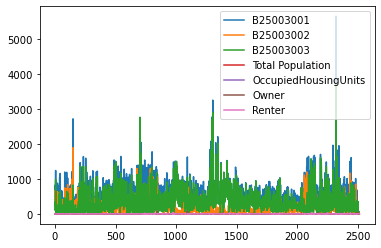

In [23]:
tenure.plot()

In [24]:
columns_to_keep = ['geoid',
 'name',
 'geometry_x',
 'Geo_FIPS',
 'Total Population', 
 'OccupiedHousingUnits',
 'Owner',
 'Renter'] 

In [25]:
tenure_web_mercator = tenure.to_crs(epsg=3857) 

AttributeError: 'DataFrame' object has no attribute 'to_crs'

<AxesSubplot:>

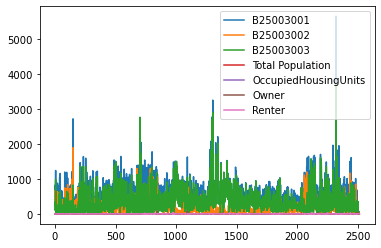

In [26]:
tenure.plot()

In [27]:
tenure_web_mercator = tenure.to_crs(epsg=3857) 

AttributeError: 'DataFrame' object has no attribute 'to_crs'

Sadly, I am getting an error. Online, it says that I need to convert the dataframe into a geodata frame. SO I'll try something like that.

In [28]:
from geopandas import GeoDataFrame

In [29]:
tenure = GeoDataFrame(tenure)

In [30]:
tenure_web_mercator = tenure.to_crs(epsg=3857) 

AttributeError: No geometry data set yet (expected in column 'geometry'.)

Okay! Hopefully if I rename geometry_x to geometry this should help. 

In [31]:
tenure.rename(columns = {'geometry_x':'geometry'}, inplace = True)

In [32]:
tenure_web_mercator = tenure.to_crs(epsg=3857) 

Yay! No error message. Let's see if it will plot.

<AxesSubplot:>

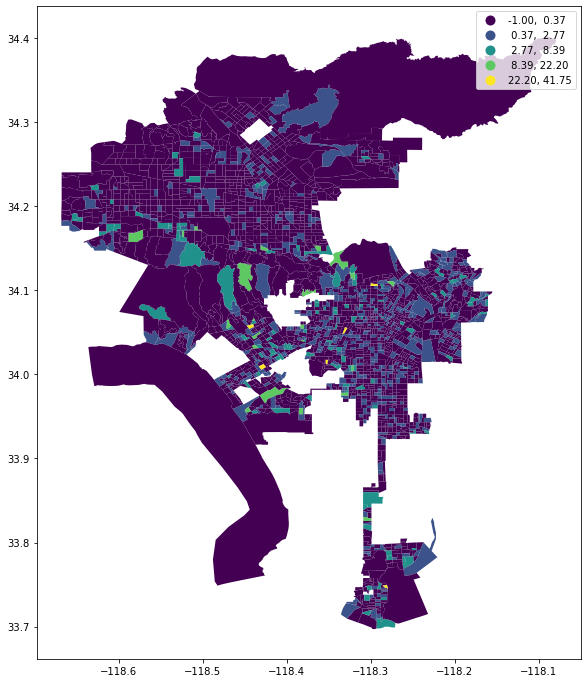

In [33]:
tenure.plot(figsize=(12,12),
                 column='Renter',
                 legend=True, 
                 scheme='NaturalBreaks')

I could die of happiness. 

<AxesSubplot:>

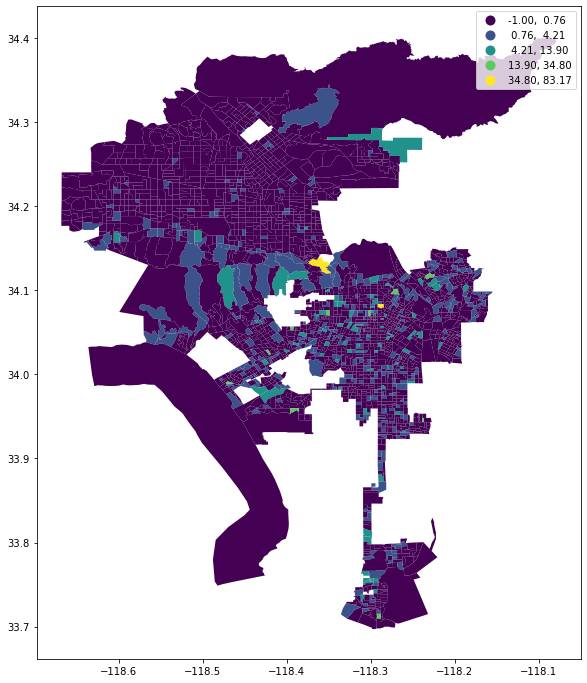

In [34]:
tenure.plot(figsize=(12,12),
                 column='Owner',
                 legend=True, 
                 scheme='NaturalBreaks')

I don't like the breaks the way they are set up. I'm also realizing I should have multiplied the percent changes by 100 because it is not very helpful right now. 

In [35]:
list(tenure.columns.values)

['geoid',
 'name',
 'B25003001',
 'B25003002',
 'B25003003',
 'geometry',
 'Geo_FIPS',
 'Geo_NAME',
 'Geo_QName',
 'Geo_STUSAB',
 'Geo_SUMLEV',
 'Geo_GEOCOMP',
 'Geo_FILEID',
 'Geo_LOGRECNO',
 'Geo_STATE',
 'Geo_COUNTY',
 'Geo_TRACT',
 'Geo_BLKGRP',
 'Total Population',
 'OccupiedHousingUnits',
 'Owner',
 'Renter',
 'geometry_y']

In [36]:
tenure['PC_TotalPop'] = tenure['Total Population']*100
tenure['PC_OHU'] = tenure['OccupiedHousingUnits']*100
tenure['PC_Owner'] = tenure['Owner']*100
tenure['PC_Renter'] = tenure['Renter']*100

In [37]:
list(tenure.columns.values)

['geoid',
 'name',
 'B25003001',
 'B25003002',
 'B25003003',
 'geometry',
 'Geo_FIPS',
 'Geo_NAME',
 'Geo_QName',
 'Geo_STUSAB',
 'Geo_SUMLEV',
 'Geo_GEOCOMP',
 'Geo_FILEID',
 'Geo_LOGRECNO',
 'Geo_STATE',
 'Geo_COUNTY',
 'Geo_TRACT',
 'Geo_BLKGRP',
 'Total Population',
 'OccupiedHousingUnits',
 'Owner',
 'Renter',
 'geometry_y',
 'PC_TotalPop',
 'PC_OHU',
 'PC_Owner',
 'PC_Renter']

<AxesSubplot:>

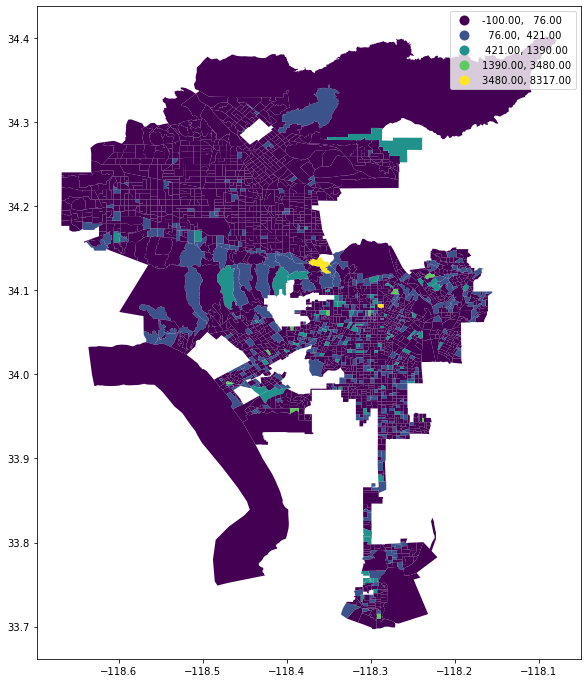

In [38]:
tenure.plot(figsize=(12,12),
                 column='PC_Owner',
                 legend=True, 
                 scheme='NaturalBreaks')

<AxesSubplot:>

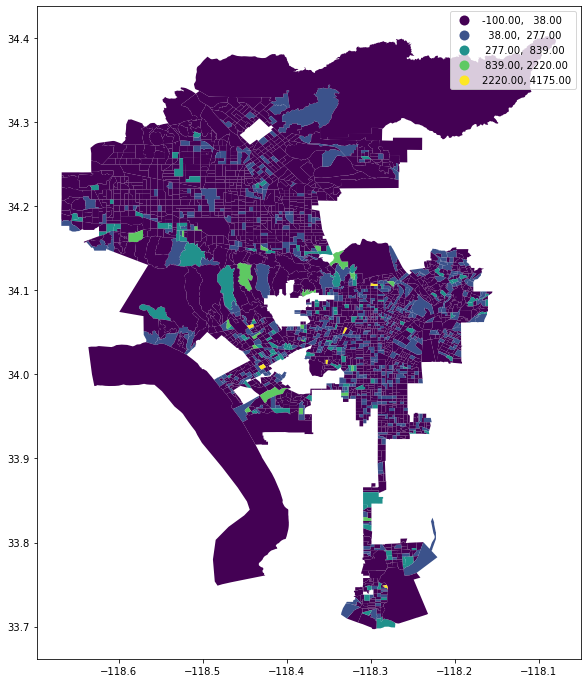

In [39]:
tenure.plot(figsize=(12,12),
                 column='PC_Renter',
                 legend=True, 
                 scheme='NaturalBreaks')

I'm also thinking a binary variable might be nice. Showing either increase or decrease in change. But I'm sure I can just put an if function in my tables to show percentages over/under 0 for this same effect. 


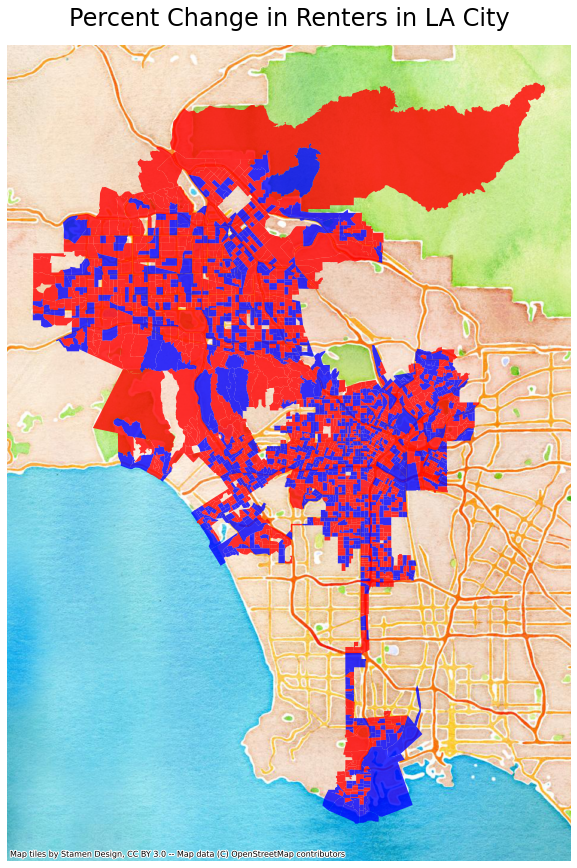

In [40]:
tenure_web_mercator = tenure.to_crs(epsg=3857) 
fig, ax = plt.subplots(figsize=(15, 15))

 
tenure_web_mercator[tenure_web_mercator['PC_Renter'] < 0].plot(                                      
                                                               ax=ax,
                                                               color="red",
                                                               alpha=0.8
)

tenure_web_mercator[tenure_web_mercator['PC_Renter'] > 0].plot(                                      
                                                               ax=ax,
                                                               color="blue",
                                                               alpha=0.8
)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Percent Change in Renters in LA City',fontsize=24,pad=20)

# add a basemap
ctx.add_basemap(ax, source=ctx.providers.Stamen.Watercolor)

So happy. We can see percent change in renters from 2010 to 2019. With red being a decrease in renters and blue being an increase. now, I hope I can put the park map in here. 

In [41]:
parks = gpd.read_file('SoCalParks.geojson')

In [42]:
parks['Park_Urban'] = parks ['Park_Urban'].astype(str)
parks['Park_Name'] = parks ['Park_Name'].astype(str)
parks['Park_Desig'] = parks ['Park_Desig'].astype(str)
parks['Park_Owner'] = parks ['Park_Owner'].astype(str)
parks['Park_Local'] = parks ['Park_Local'].astype(str)
parks['Park_Manag'] = parks ['Park_Manag'].astype(str)
parks['Park_Loc_1'] = parks ['Park_Loc_1'].astype(str)
parks['Park_Statu'] = parks ['Park_Statu'].astype(str)
parks['Park_Est_D'] = parks ['Park_Est_D'].astype(str)
parks['Park_Addre'] = parks ['Park_Addre'].astype(str)
parks['Park_State'] = parks ['Park_State'].astype(str)
parks['Park_Sta_1'] = parks ['Park_Sta_1'].astype(str)
parks['Park_Count'] = parks ['Park_Count'].astype(str)   
parks['Park_Cou_1'] = parks ['Park_Cou_1'].astype(str)     
parks['Park_Place'] = parks ['Park_Place'].astype(str)
parks['Park_Pla_1'] = parks ['Park_Pla_1'].astype(str)   
parks['Park_Urb_1'] = parks ['Park_Urb_1'].astype(str)     
parks['Park_Zip'] = parks ['Park_Zip'].astype(str)
parks['Park_Bound'] = parks ['Park_Bound'].astype(str)   
parks['Park_Sourc'] = parks ['Park_Sourc'].astype(str)     
parks['Park_Feedb'] = parks ['Park_Feedb'].astype(str)
parks['Park_DateA'] = parks ['Park_DateA'].astype(str) 
parks['DataShare_'] = parks ['DataShare_'].astype(str)

In [43]:
type(parks.Park_Urban)

pandas.core.series.Series

In [44]:
parks.plot(figsize=(12,12),
                 column='Park_Urban',
                 legend=True, 
                 scheme='NaturalBreaks')

ValueError: 'box_aspect' and 'fig_aspect' must be positive

ValueError: 'box_aspect' and 'fig_aspect' must be positive

<Figure size 864x864 with 1 Axes>

<AxesSubplot:>

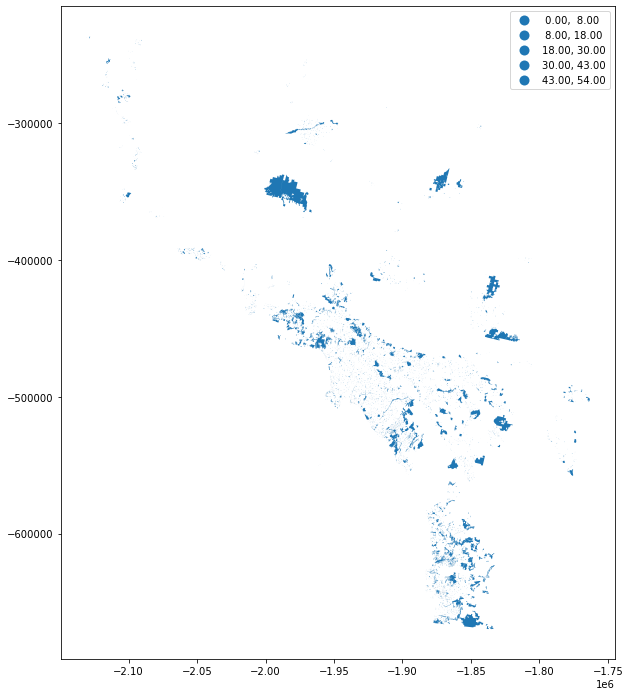

In [45]:
 parks.plot(figsize=(12,12),
                 column='Park_Urban',
                 legend=True, 
                 scheme='NaturalBreaks',
                  aspect=1 )

Not exactly sure why, but when I put aspect = 1. The error message leaves. 

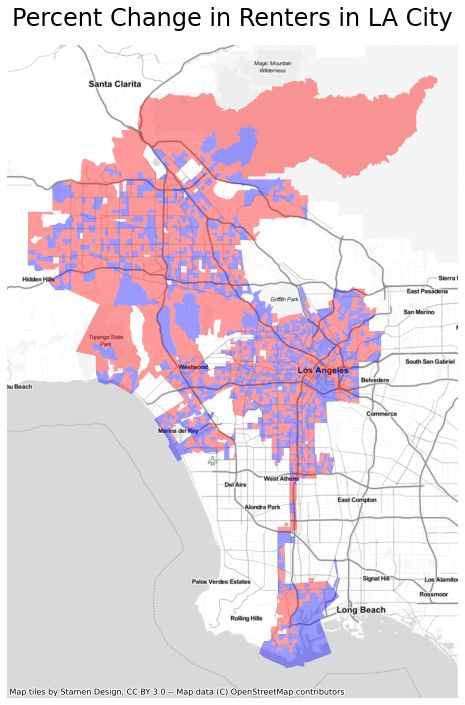

In [54]:
 
fig, ax = plt.subplots(figsize=(12, 12))

 

parks_web_mercator = parks.to_crs(epsg=3857) 
parks_web_mercator[parks_web_mercator['Park_Urban'] == 'Los Angeles--Long Beach--Anaheim, CA'].plot(                                      
                                                               ax=ax,
                                                               color="green",
                                                               alpha=0.8)
tenure_web_mercator = tenure.to_crs(epsg=3857) 
tenure_web_mercator[tenure_web_mercator['PC_Renter'] < 0].plot(                                      
                                                               ax=ax,
                                                               color="red",
                                                               alpha=0.4
)

tenure_web_mercator[tenure_web_mercator['PC_Renter'] > 0].plot(                                      
                                                               ax=ax,
                                                               color="blue",
                                                               alpha=0.4
)

 


# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Percent Change in Renters in LA City',fontsize=24,pad=20)

# add a basemap
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

I don't understand why the parks aren't showing up. But this is a nice map of percent change in renters at least lol. 

<AxesSubplot:>

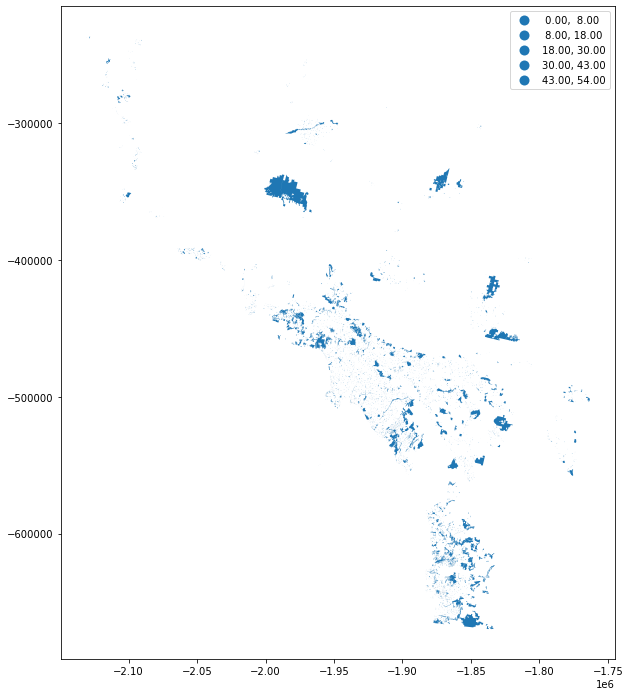

In [57]:
 parks.plot(figsize=(12,12),
                 column='Park_Urban',
                 legend=True, 
                 scheme='NaturalBreaks',
                  aspect=1 )

It seems like something is going on when I try to use web mercator

In [58]:
parks = GeoDataFrame(parks)

Idk, I just feel like this could work.

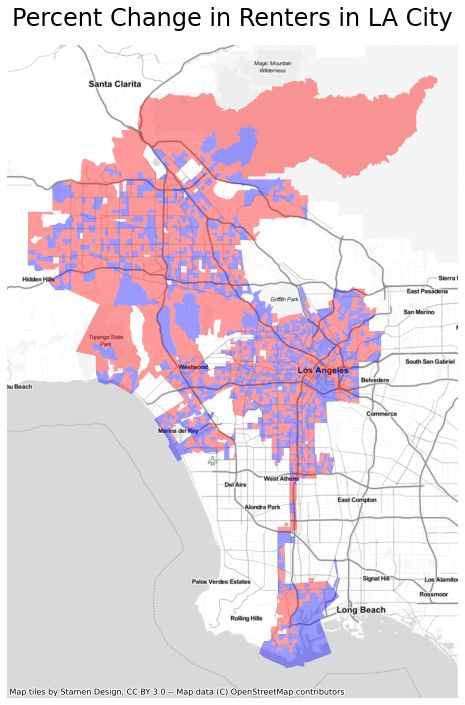

In [59]:
fig, ax = plt.subplots(figsize=(12, 12))

 

parks_web_mercator = parks.to_crs(epsg=3857) 
parks_web_mercator[parks_web_mercator['Park_Urban'] == 'Los Angeles--Long Beach--Anaheim, CA'].plot(                                      
                                                               ax=ax,
                                                               color="green",
                                                               alpha=0.8)
tenure_web_mercator = tenure.to_crs(epsg=3857) 
tenure_web_mercator[tenure_web_mercator['PC_Renter'] < 0].plot(                                      
                                                               ax=ax,
                                                               color="red",
                                                               alpha=0.4
)

tenure_web_mercator[tenure_web_mercator['PC_Renter'] > 0].plot(                                      
                                                               ax=ax,
                                                               color="blue",
                                                               alpha=0.4
)

 


# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Percent Change in Renters in LA City',fontsize=24,pad=20)

# add a basemap
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

I am sad. 

<AxesSubplot:>

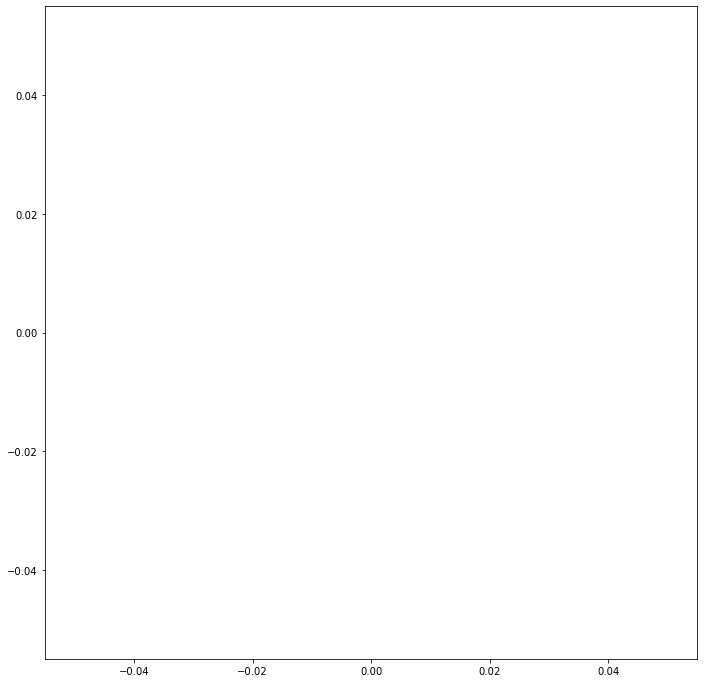

In [60]:
fig, ax = plt.subplots(figsize=(12, 12))

parks_web_mercator = parks.to_crs(epsg=3857) 
parks_web_mercator[parks_web_mercator['Park_Urban'] == 'Los Angeles--Long Beach--Anaheim, CA'].plot(                                      
                                                               ax=ax,
                                                               color="green",
                                                               alpha=0.8)

Please hit me up if you know what I could do to fix this. It is beyond the scope of this week's homework but would love some feedback. 